In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings

In [25]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
X = df.drop(columns=['math score'],axis=1)
y = df['math score']

In [28]:
#Create Column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder" , oh_transformer , cat_features),
        ("StandardScaler" , numeric_transformer , num_features)
    ]
)

In [29]:
X = preprocessor.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.20 , random_state=42)

In [31]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    r2_square = r2_score(true,predicted)

    return mae,mse,r2_square

In [33]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-neighbors regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(verbose=False),
    "AdaBoostRegressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_mse , model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae , model_test_mse , model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for taining set")
    print("- Mean Squared Error : {:.4f}".format(model_train_mae))
    print("- Mean absolute Error : {:.4f}".format(model_train_mae))
    print("- r2 Score : {:.4f}".format(model_train_r2))

    print("--------------------------------------------------")

    print("Model performance for testing set")
    print("- Mean Squared Error : {:.4f}".format(model_test_mse))
    print("- Mean absolute Error : {:.4f}".format(model_test_mae))
    print("- r2 Score : {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print("=" * 35)
    

Linear Regression
Model performance for taining set
- Mean Squared Error : 4.2788
- Mean absolute Error : 4.2788
- r2 Score : 0.8741
--------------------------------------------------
Model performance for testing set
- Mean Squared Error : 29.2638
- Mean absolute Error : 4.2259
- r2 Score : 0.8797
Lasso
Model performance for taining set
- Mean Squared Error : 5.2063
- Mean absolute Error : 5.2063
- r2 Score : 0.8071
--------------------------------------------------
Model performance for testing set
- Mean Squared Error : 42.5064
- Mean absolute Error : 5.1579
- r2 Score : 0.8253
Ridge
Model performance for taining set
- Mean Squared Error : 4.2650
- Mean absolute Error : 4.2650
- r2 Score : 0.8743
--------------------------------------------------
Model performance for testing set
- Mean Squared Error : 29.0563
- Mean absolute Error : 4.2111
- r2 Score : 0.8806
K-neighbors regressor
Model performance for taining set
- Mean Squared Error : 4.5187
- Mean absolute Error : 4.5187
- r2 Sc

In [35]:
pd.DataFrame(list(zip(model_list , r2_list)) , columns=['Model Name' , 'R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879740
5,Random Forest Regressor,0.853528
7,CatBoostRegressor,0.851632
8,AdaBoostRegressor,0.847046
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-neighbors regressor,0.783898
4,Decision Tree,0.728793


### Linear Regression

In [36]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test , y_pred)

print("Accuracy of model is %.2f" %score)

Accuracy of model is 0.88


Text(0, 0.5, 'Predict')

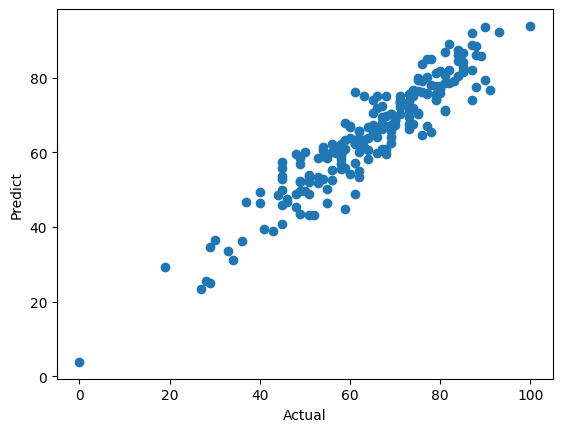

In [37]:
plt.scatter(x = y_test , y = y_pred)
plt.xlabel("Actual")
plt.ylabel("Predict")

<Axes: xlabel='math score'>

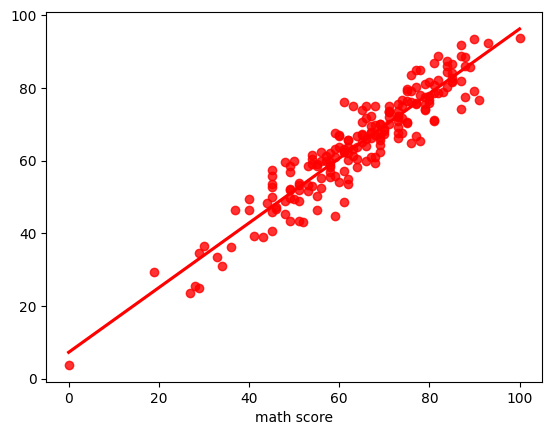

In [39]:
sns.regplot(x = y_test , y = y_pred , ci=None , color='red')

In [42]:
pred_df = pd.DataFrame({"Actual value":y_test , "Predicted value":y_pred,"Difference" : y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125
